In [ ]:
%cd ..

In [2]:
import torch
obj = torch.load("data/processed/fi2010_processed.pt", weights_only=False)

lob = obj["lob"]
N, F = lob.shape
seq_labels = obj["seq_labels"]
window_size = obj["window_size"]
horizon = obj["horizon"]
mean = obj["mean"]
std = obj["std"]


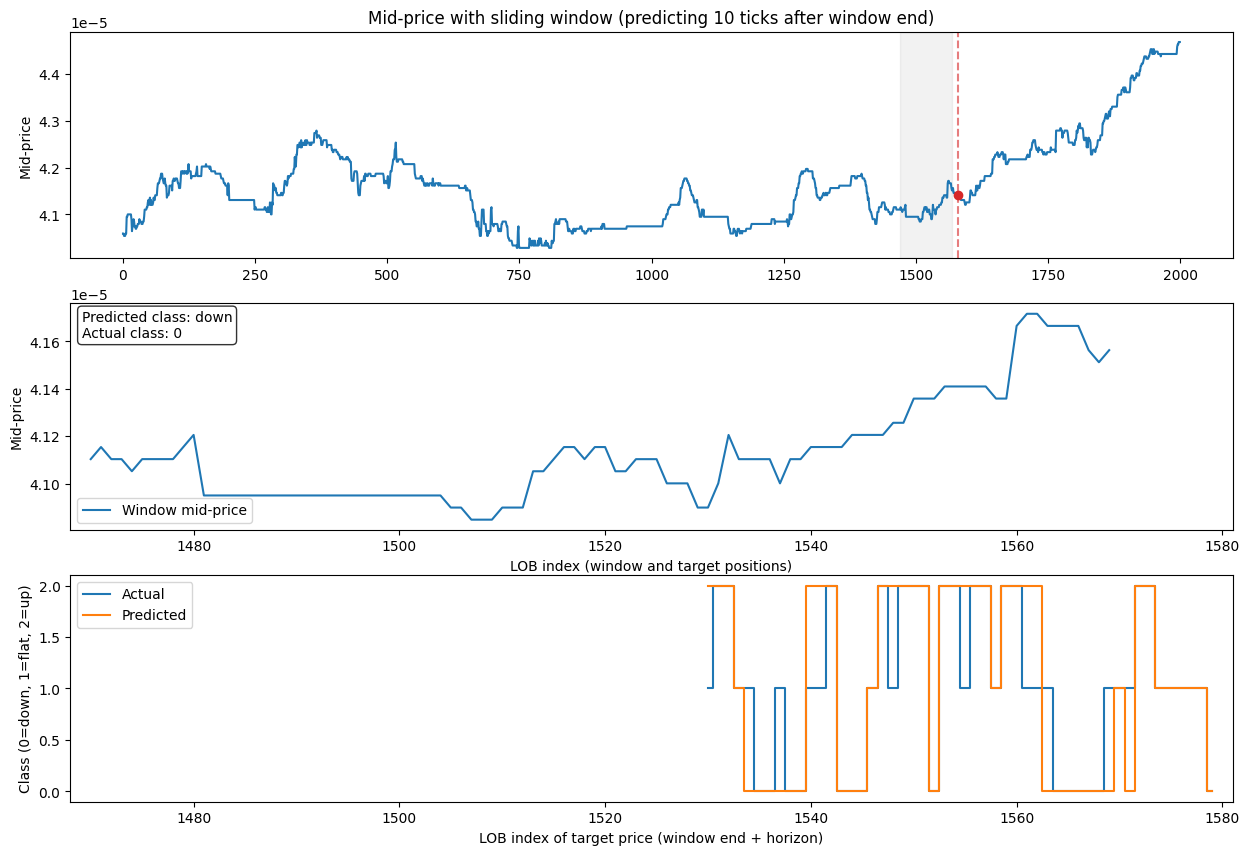

In [ ]:
import torch
from src.lob.data.dataset import get_datasets
from src.lob.models.transformer import LOBTransformer, ModelConfig
from src.lob.visualize.stream import visualize

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ckpt = torch.load("checkpoints/transformer_balanced.pt", map_location=device)

state_dict = ckpt["model_state_dict"]
if any(k.startswith("_orig_mod.") for k in state_dict):
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}

config = ModelConfig.base()
model = LOBTransformer(config)
model.load_state_dict(state_dict)
model.to(device).eval()

train_dataset, _, _ = get_datasets()
visualize(model=model, obj=obj, visualization_sleep=0.0001)


In [ ]:
best_ask_raw = lob[:, 0]
best_bid_raw = lob[:, 2]
mid = 0.5 * (best_ask_raw + best_bid_raw) / 10000.0

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mid[:100])

In [ ]:
plt.plot(seq_labels[:100])

In [ ]:
len(seq_labels)

In [ ]:
len(mid)